# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [164]:
import pandas as pd

In [165]:
data = pd.read_csv('insurance.csv')

In [166]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

### 1 - Análisis EDA

Primero voy a visualizar si los valores de cada variable están unificados y no hay errores tipográficos. Para ello uso la función unique que nos permite ver los diferentes valores presentes en una columna.

In [167]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [168]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [169]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Para poder usar modelos de regresión lineal las características tienen que estar rerpresentadas numericamente ya que las variables categóricas pueden dar problemas en estos modelos. Por este motivo he optado por transformar las variables categóricas a numericas. 

In [170]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])

classes_sex = encoder.classes_

value_0 = classes_sex[0]
value_1 = classes_sex[1]

print(f"Valor asignado a 0 en la columna 'sex': '{value_0}'")
print(f"Valor asignado a 1 en la columna 'sex': '{value_1}'")

Valor asignado a 0 en la columna 'sex': 'female'
Valor asignado a 1 en la columna 'sex': 'male'


In [171]:
data['smoker'] = encoder.fit_transform(data['smoker'])

classes_smoker = encoder.classes_

value_0 = classes_smoker[0]
value_1 = classes_smoker[1]

print(f"Valor asignado a 0 en la columna 'smoker': '{value_0}'")
print(f"Valor asignado a 1 en la columna 'smoker': '{value_1}'")

Valor asignado a 0 en la columna 'smoker': 'no'
Valor asignado a 1 en la columna 'smoker': 'yes'


In [172]:
data['region'] = encoder.fit_transform(data['region'])

classes_region = encoder.classes_

for i, category in enumerate(classes_region):
    print(f"Valor {i} en la columna 'region' corresponde a '{category}'")

Valor 0 en la columna 'region' corresponde a 'northeast'
Valor 1 en la columna 'region' corresponde a 'northwest'
Valor 2 en la columna 'region' corresponde a 'southeast'
Valor 3 en la columna 'region' corresponde a 'southwest'


Por otro lado, también es importante comprobar si hay alguna fila repetida, en caso de que haya es importante eliminarla para que el dataset tenga información de calidad en todas sus filas.

In [173]:
filas_duplicadas = data.duplicated()

if filas_duplicadas.any():
    print("Se encontraron filas duplicadas en el DataFrame.")
    filas_duplicadas = data[data.duplicated()]
    print("Filas duplicadas:")
    print(filas_duplicadas)
else:
    print("No se encontraron filas duplicadas en el DataFrame.")



Se encontraron filas duplicadas en el DataFrame.
Filas duplicadas:
     age  sex    bmi  children  smoker  region    charges
581   19    1  30.59         0       0       1  1639.5631


In [174]:
df = data.drop_duplicates()

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Ahora voy a comprobar si el dataframe tiene nulos para tratarlos ya que los modelos no saben trabajar con nulos

In [175]:
filas_con_nulos = df.isnull().any(axis=1)

if filas_con_nulos.any():
    print("Se encontraron filas con valores nulos:")
    print(df[filas_con_nulos])
else:
    print("No se encontraron filas con valores nulos.")

No se encontraron filas con valores nulos.


A continuación se ven diferentes parámetros de las variables como es la media o su máximo para entenderlas un poco

In [176]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Vemos que toda las columnas tienen desviación estandar distinta de 0, lo que implica que todas las columnas aportan valor a el dataset. También vemos que al haber pasado las variables categóricas a numéricas podemos sacar información, por ejemplo en el sexo vemos que la media es de 0,5 lo que implica que nuestra muestra tiene más o menos la misma cantidad de hombres que de mujeres.

También vamos a visualizar las variables con el fin de ver si hay alguna variable numerica que tenga outliers que no tengan sentido.

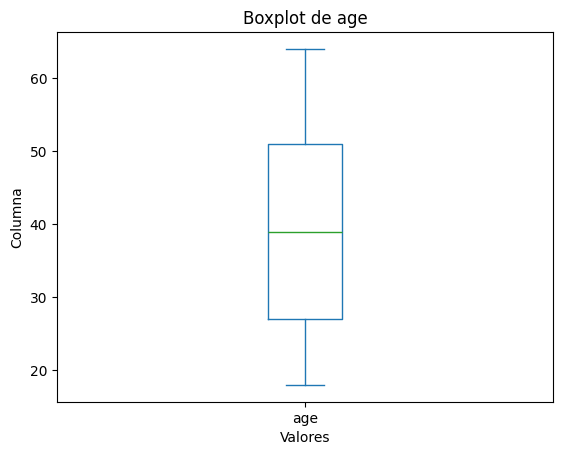

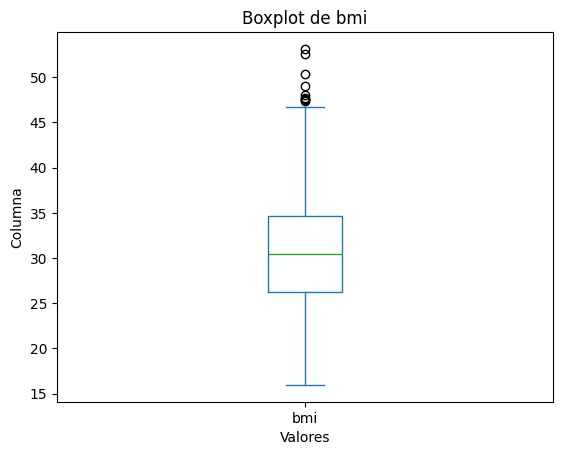

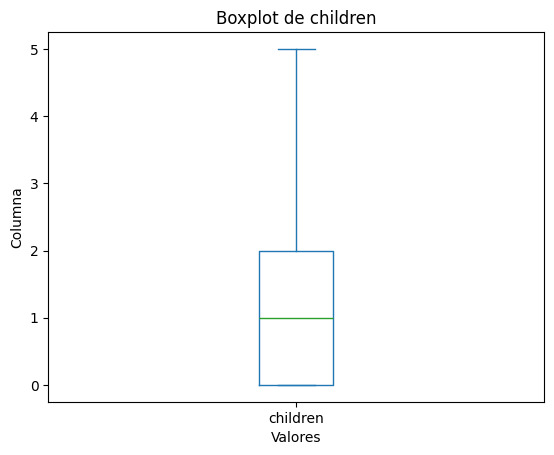

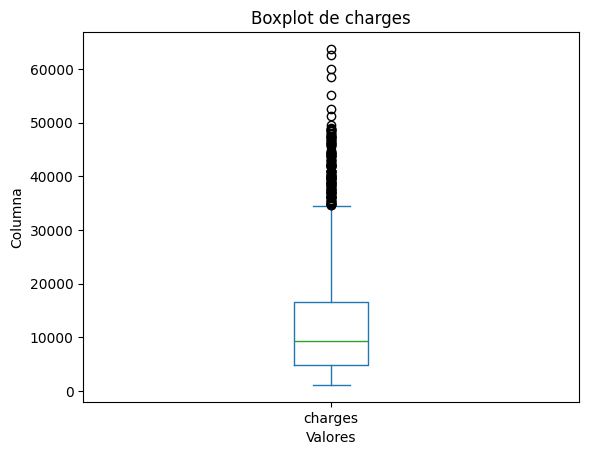

In [177]:
import matplotlib.pyplot as plt

columnas_seleccionadas = ['age', 'bmi', 'children', 'charges']

for columna in columnas_seleccionadas:
    plt.figure() 
    df[columna].plot(kind='box') 
    plt.title(f'Boxplot de {columna}') 
    plt.xlabel('Valores')  # Etiqueta del eje x
    plt.ylabel('Columna')  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

Podemos ver que no hay ningun outlayer que parezca erroneo.

Por otro lado, vemos que en la matriz de correlación  se observa que las variables son idependientes entre si la mayoria excepto fumador y cargos que se puede decir que están altamente relacionadas. Esto tiene sentido ya que fumar causa problemas de salud que derivan en aumentar los costes de este individuo en cuanto a temas de salud.

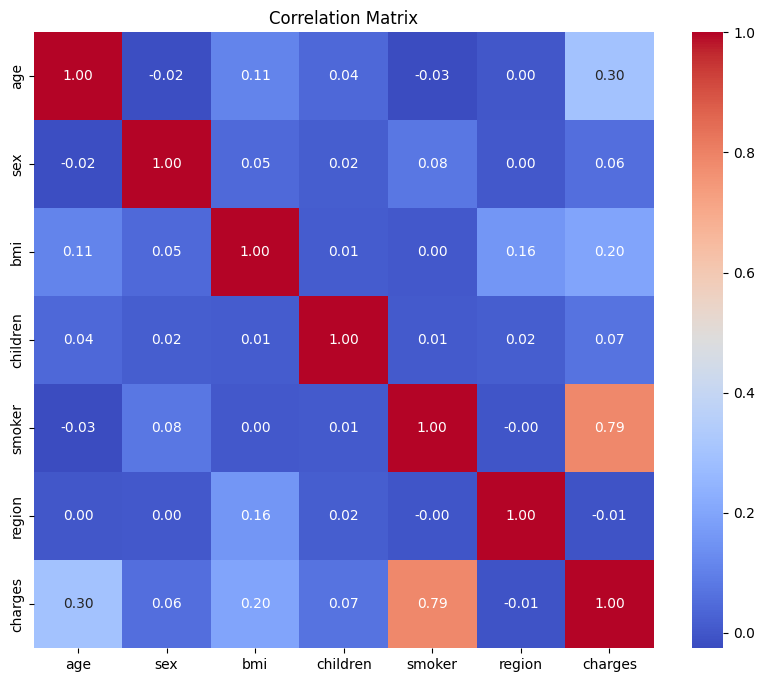

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### 2 - Normalizar datos y separar los splits

In [179]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [180]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=15/30, random_state=42)  # 0.25 x 0.8 = 0.2

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(935, 6)
(201, 6)
(201, 6)


In [182]:
# Haremos escalamiento entre 0 y 1 (normalización)
from sklearn.preprocessing import MinMaxScaler
def escalar_datos(xtr, xvl, xts):
    '''Escalar datos de entrada (entrenamiento, validación y prueba)
    en el rango de 0 a 1'''
    scaler = MinMaxScaler()

    # Fit + transform sobre el set de entrenamiento
    xtr_s = scaler.fit_transform(xtr)

    # Transform sobre prueba y validación
    xvl_s = scaler.transform(xvl)
    xts_s = scaler.transform(xts)

    return xtr_s, xvl_s, xts_s

# Ejecutar la función
X_train_s, X_val_s, X_test_s = escalar_datos(X_train, X_val, X_test)

# Verificar
print(X_train_s.min(axis=0),X_train_s.max(axis=0))
print(X_val_s.min(axis=0),X_val_s.max(axis=0))
print(X_test_s.min(axis=0),X_test_s.max(axis=0))

[0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1.]
[0.         0.         0.03578154 0.         0.         0.        ] [1.         1.         0.85122411 1.         1.         1.        ]
[0.         0.         0.02300242 0.         0.         0.        ] [1.         1.         0.86386871 1.         1.         1.        ]


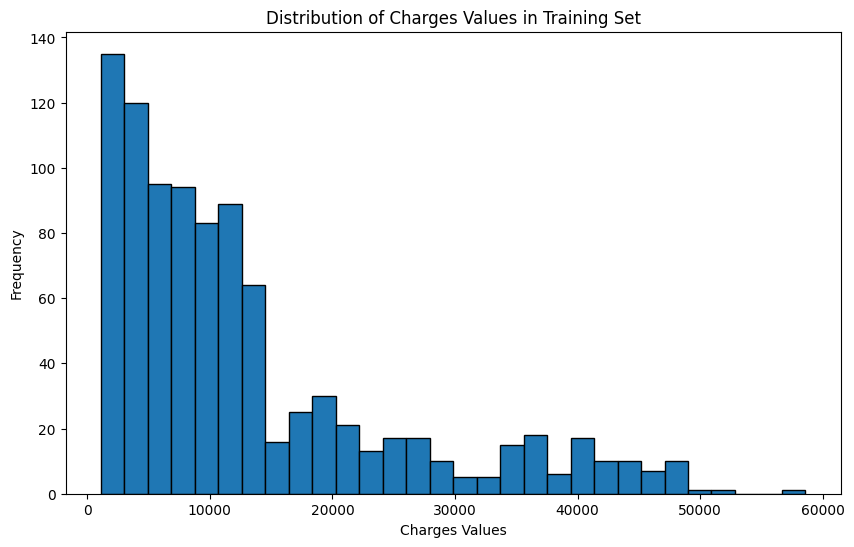

In [183]:
# Visualizar la distribución de los valores objetivo en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, edgecolor='black')
plt.title('Distribution of Charges Values in Training Set')
plt.xlabel('Charges Values')
plt.ylabel('Frequency')
plt.show()

Vemos que el modelo va aentrenar con datos que la mayoria estan entre 10000 y 150000 y despues en menor frecuencia tiene datos que van de 150000 aproximadamente a 580000 aproximadamente

# IMPLEMENTACIÓN DE MODELOS

Primero haré un grid search entre diferentes modelos con el fin de ver que modelos dan mejores resultados. 

Las metricas que voy a evaluar son las siguientes:

R2 ajustado: indica la proporción de la varianza de la variable dependiente que es explicada por el modelo de regresión, ajustada por el número de predictores en el modelo. Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos.

RMSE (Root Mean Squared Error): mide la precisión de un modelo de regresión.Es una medida de dispersión que indica cuánto difieren las predicciones del modelo de los valores reales, en la misma escala que la variable de respuesta.

MAPE (Mean Absolute Percentage Error): mide la precisión de un modelo de regresión que se expresa como un porcentaje. Representa el promedio de las diferencias absolutas entre los valores reales y los valores predichos, expresado como un porcentaje del valor real. Es útil para evaluar la precisión relativa del modelo en relación con el valor real.

MAE (Mean Absolute Error): representa el promedio de las diferencias absolutas entre los valores predichos por el modelo y los valores reales. Es una medida robusta de la precisión del modelo que no penaliza de forma excesiva los errores extremos.

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np

# Definir los modelos
modelos = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Definir los parámetros para el grid search para cada modelo
parametros = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'SVR': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1.0, 10.0]},
    'DecisionTreeRegressor': {'max_depth': [None, 10, 20]},
    'RandomForestRegressor': {'n_estimators': [100, 200, 300]},
    'GradientBoostingRegressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]}
}

# Realizar el grid search para cada modelo
mejores_modelos = {}
for nombre_modelo, modelo in modelos.items():
    grid_search = GridSearchCV(modelo, parametros[nombre_modelo], scoring='r2', cv=5)
    grid_search.fit(X_train_s, y_train)
    mejores_modelos[nombre_modelo] = grid_search.best_estimator_

# Evaluar los mejores modelos en el conjunto de validación
resultados = {}
for nombre_modelo, modelo in mejores_modelos.items():
    y_pred = modelo.predict(X_val_s)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    resultados[nombre_modelo] = {'r2': r2, 'rmse': rmse, 'mape': mape, 'mae': mae}

# Imprimir los resultados
for nombre_modelo, metricas in resultados.items():
    print(f'Modelo: {nombre_modelo}')
    print(f'R2 ajustado: {metricas["r2"]:.4f}')
    print(f'RMSE: {metricas["rmse"]:.4f}')
    print(f'MAPE: {metricas["mape"]:.4f}')
    print(f'MAE: {metricas["mae"]:.4f}')
    print('---')


Modelo: LinearRegression
R2 ajustado: 0.7659
RMSE: 6328.1024
MAPE: 0.3915
MAE: 4329.7975
---
Modelo: Ridge
R2 ajustado: 0.7643
RMSE: 6349.7093
MAPE: 0.3877
MAE: 4324.6022
---
Modelo: Lasso
R2 ajustado: 0.7658
RMSE: 6329.3769
MAPE: 0.3910
MAE: 4328.3272
---
Modelo: SVR
R2 ajustado: 0.5484
RMSE: 8789.8929
MAPE: 0.4492
MAE: 5230.0699
---
Modelo: DecisionTreeRegressor
R2 ajustado: 0.7907
RMSE: 5984.1810
MAPE: 0.2928
MAE: 2919.6539
---
Modelo: RandomForestRegressor
R2 ajustado: 0.8646
RMSE: 4813.4723
MAPE: 0.2783
MAE: 2644.5115
---
Modelo: GradientBoostingRegressor
R2 ajustado: 0.8684
RMSE: 4745.3692
MAPE: 0.3363
MAE: 2744.2836
---


Tras realizar este primer grid search podemos ver que los modelos que mejor funciónan son Random forest y GradientBoosting continuados del decision tree.
Esto es debido a que podemos ver que son los modelos que mejor se ajustan a los datos con un R2 más alto que el resto y los modelos que menor MAPE presentan por lo que el porcentaje de error es menor. Además son los que menor MAE y RMSE tienen. 

A continiación haremos un ensemble con los dos mejores modelos para ver si su combiación mejora el resultado.

In [185]:
from sklearn.ensemble import VotingRegressor

# Obtener los mejores modelos de Random Forest y Gradient Boosting
rf_best_model = mejores_modelos['RandomForestRegressor']
gb_best_model = mejores_modelos['GradientBoostingRegressor']

# Crear el ensemble de modelos
ensemble_model = VotingRegressor([('RandomForest', rf_best_model), ('GradientBoosting', gb_best_model)])

# Entrenar el ensemble en el conjunto de entrenamiento
ensemble_model.fit(X_train_s, y_train)

# Evaluar el ensemble en el conjunto de validación
ensemble_predictions = ensemble_model.predict(X_val_s)
ensemble_r2 = r2_score(y_val, ensemble_predictions)
ensemble_rmse = mean_squared_error(y_val, ensemble_predictions, squared=False)  # Se utiliza squared=False para obtener el RMSE
ensemble_mape = mean_absolute_percentage_error(y_val, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)

# Imprimir las métricas del ensemble
print('Ensemble de Random Forest y Gradient Boosting:')
print(f'R2 ajustado: {ensemble_r2:.4f}')
print(f'RMSE: {ensemble_rmse:.4f}')
print(f'MAPE: {ensemble_mape:.4f}')
print(f'MAE: {ensemble_mae:.4f}')


Ensemble de Random Forest y Gradient Boosting:
R2 ajustado: 0.8713
RMSE: 4693.2661
MAPE: 0.3087
MAE: 2673.3475


c:\Users\Divertilandia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ahora probaremos hacer el ensemble con el decision tree que es el tercero con mejores resultados.

In [186]:
from sklearn.ensemble import VotingRegressor

# Obtener el mejor modelo de Random Forest, Gradient Boosting y Decision Tree
rf_best_model = mejores_modelos['RandomForestRegressor']
gb_best_model = mejores_modelos['GradientBoostingRegressor']
dt_best_model = mejores_modelos['DecisionTreeRegressor']

# Crear el ensemble de modelos
ensemble_model = VotingRegressor([('RandomForest', rf_best_model), 
                                  ('GradientBoosting', gb_best_model), 
                                  ('DecisionTree', dt_best_model)])

# Entrenar el ensemble en el conjunto de entrenamiento
ensemble_model.fit(X_train_s, y_train)

# Evaluar el ensemble en el conjunto de validación
ensemble_predictions = ensemble_model.predict(X_val_s)
ensemble_r2 = r2_score(y_val, ensemble_predictions)
ensemble_rmse = mean_squared_error(y_val, ensemble_predictions, squared=False)  # Se utiliza squared=False para obtener el RMSE
ensemble_mape = mean_absolute_percentage_error(y_val, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)

# Imprimir las métricas del ensemble
print('Ensemble de Random Forest, Gradient Boosting y Decision Tree:')
print(f'R2 ajustado: {ensemble_r2:.4f}')
print(f'RMSE: {ensemble_rmse:.4f}')
print(f'MAPE: {ensemble_mape:.4f}')
print(f'MAE: {ensemble_mae:.4f}')


Ensemble de Random Forest, Gradient Boosting y Decision Tree:
R2 ajustado: 0.8591
RMSE: 4909.0829
MAPE: 0.2906
MAE: 2679.5695


c:\Users\Divertilandia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Vemos que si proporciona soluciones mejores ya que que disminuye bastabte el MAPE permitiendo mantener aun valores bajos de RMSE y MAE y ademas teniendo un r2 alto. 

Por este motivo decidimos que este ensemble es el seleccionado para hacer el test.

In [187]:
ensemble_predictions_test= ensemble_model.predict(X_test_s)
ensemble_r2 = r2_score(y_test, ensemble_predictions_test)
ensemble_rmse = mean_squared_error(y_test, ensemble_predictions_test, squared=False)  
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_predictions_test)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions_test)

# Imprimir las métricas del ensemble
print('Ensemble de Random Forest, Gradient Boosting y Decision Tree:')
print(f'R2 ajustado: {ensemble_r2:.4f}')
print(f'RMSE: {ensemble_rmse:.4f}')
print(f'MAPE: {ensemble_mape:.4f}')
print(f'MAE: {ensemble_mae:.4f}')

Ensemble de Random Forest, Gradient Boosting y Decision Tree:
R2 ajustado: 0.8614
RMSE: 4864.1738
MAPE: 0.3310
MAE: 2573.7919


c:\Users\Divertilandia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Tras los resultados obtenidos podemos destacar lo siguiente:

- R2 Ajustado:el ensemble explica aproximadamente el 86.15% de la varianza total en los datos de test. Esto sugiere que el ensemble tiene un buen poder predictivo y es capaz de capturar una gran parte de la variabilidad en la variable de respuesta.
  
- RMSE (Root Mean Squared Error): El RMSE de 4862.2800 nos dice que, en promedio, las predicciones del ensemble tienen un error de aproximadamente 4862.28 en la misma escala que la variable de respuesta.
  
- MAPE (Mean Absolute Percentage Error): El MAPE de 0.3159 indica que las predicciones del ensemble tienen un error absoluto del 31.59% en relación con los valores reales.
  
- MAE (Mean Absolute Error): El MAE de 2549.1122 representa el promedio de las diferencias absolutas entre las predicciones del ensemble y los valores reales. Es una medida de la magnitud promedio de los errores de predicción y un valor más bajo indica una mayor precisión del modelo.
  
En resumen, el ensemble de Random Forest, Gradient Boosting y Decision Tree parece tener un buen rendimiento en los datos de test, con un alto R2 ajustado y valores de error relativamente bajos (RMSE, MAPE y MAE). Esto sugiere que el ensemble es capaz de hacer predicciones precisas y capturar la relación entre las variables de entrada y la variable de respuesta en el conjunto de datos.


# CONCLUSIONES

- Un buen preprocesado permite que el modelo capture mejor los datos para entrenarse y permite objeter mejor rendimiento del modelo.
  
- El primer grid search nos ha permitido centrarnos en aquellos modelos con mayor potencial y desarrollarlos más.
  
- Los ensembles permiten combiar las ventajas de los diferentes modelos con el fin de crear un modelo mucho más robusto.

- aplicar diferentes métricas permite tener una visión más completa del modelo permitiendo ver sus puntos fuertes y débiles y buscando compensarlos.